In [2]:
# importing libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
sales = pd.read_csv("Amazon Sales data.csv")
sales.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2


In [6]:
# checking shape

sales.shape

(100, 14)

In [7]:
#columns name

sales.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [8]:
sales[['Units Sold', 'Unit Price',	'Unit Cost', 'Total Revenue', 'Total Cost',	'Total Profit']].describe()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


### Data cleaning

In [6]:
# checking missing values
sales.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [7]:
# convert order date to Datetime
sales['Order Date'] = pd.to_datetime(sales['Order Date'])

In [8]:
# extract year and month from order date
sales['Year'] = sales['Order Date'].dt.year
sales['Month'] = sales['Order Date'].dt.month
sales.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2


### Data Analysis

In [9]:
# calculate no.of regions
regions = sales['Region'].nunique()
print('No of Regions:',regions)

No of Regions: 7


In [10]:
# calculate the number of countries
country = sales['Country'].nunique()
print('No of countries:',country)

No of countries: 76


In [11]:
# calculate the Item type 
item_type = sales['Item Type'].nunique()
print('No of Item type:',item_type)

No of Item type: 12


In [12]:
# calculate the total unit sold
unit_sold = sales['Units Sold'].sum()
print("total unit sold:",unit_sold)

total unit sold: 512871


In [13]:
#calculate the total unit cost
unit_cost = sales['Unit Cost'].sum()
print("total unit cost:",unit_cost)

total unit cost: 19104.8


In [14]:
#calculate the total revenue
total_revenue = sales['Total Revenue'].sum()
print("total Revenue:",total_revenue)

total Revenue: 137348768.31


In [15]:
#calculate the total cost
total_cost = sales['Total Cost'].sum()
print("total cost:",total_cost)

total cost: 93180569.91000001


In [16]:
#calculate the total profit
total_profit = sales['Total Profit'].sum()
print("total profit:",total_profit)

total profit: 44168198.39999999


In [17]:
sales.groupby(['Region','Sales Channel'])['Total Profit'].sum()

Region                             Sales Channel
Asia                               Offline          3584286.33
                                   Online           2529559.54
Australia and Oceania              Offline          1886283.82
                                   Online           2835876.21
Central America and the Caribbean  Offline          2475814.99
                                   Online            371092.86
Europe                             Offline          5574539.91
                                   Online           5508398.72
Middle East and North Africa       Offline          2169081.08
                                   Online           3592110.78
North America                      Offline          1457942.76
Sub-Saharan Africa                 Offline          7772777.78
                                   Online           4410433.62
Name: Total Profit, dtype: float64

### Data Visualisation

Text(0, 0.5, 'Total Revenue')

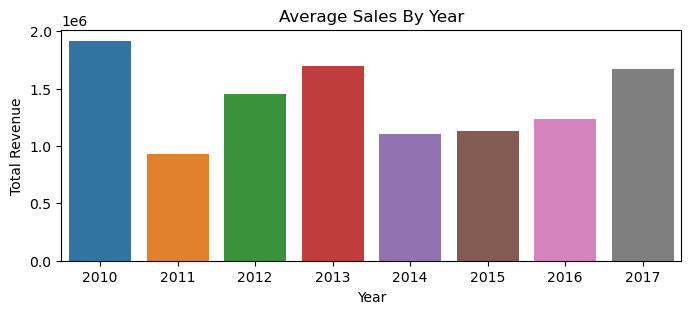

In [18]:
# year wise sales
year_sales = sales.groupby('Year')['Total Revenue'].mean()
plt.figure(figsize=(8,3))
sns.barplot(x=year_sales.index,y=year_sales.values,)
plt.title('Average Sales By Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')

Text(0.5, 1.0, 'Average Profit in Region wise')

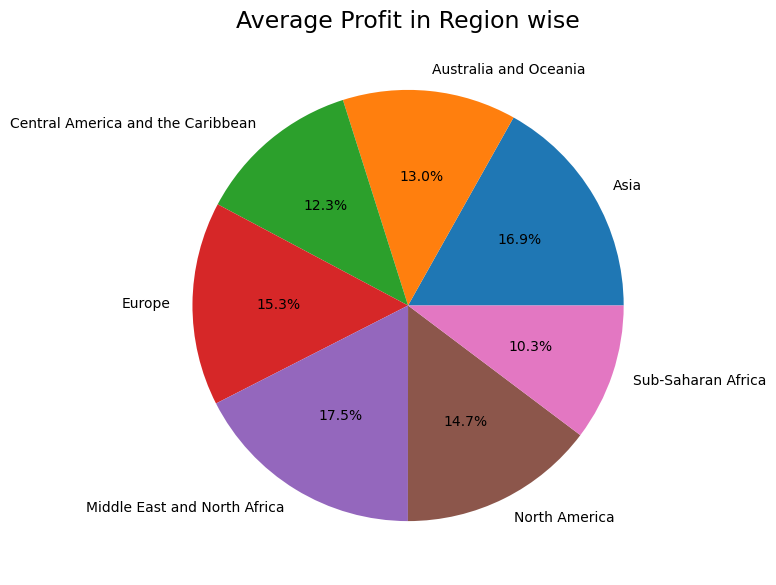

In [19]:
#pie chart of total profit in region wise
plt.figure(figsize=(7,7))
region_totalrevenue = sales.groupby('Region')['Total Profit'].mean()
plt.pie(region_totalrevenue,labels=region_totalrevenue.index,autopct='%1.1f%%')
plt.title("Average Profit in Region wise",fontsize=17)

In [23]:
# group total Revenue by Item Type
TotalRevenue_ItemType = sales.groupby('Item Type')['Total Revenue'].sum()

Text(0.5, 1.0, 'Average Rvennue by product type')

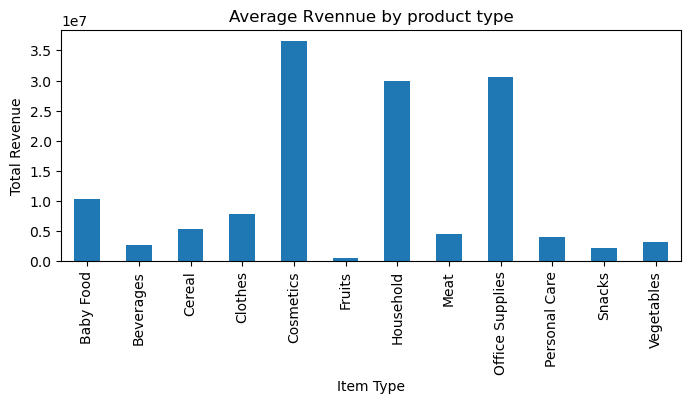

In [28]:
# bar chart for total revenue by item Type
plt.figure(figsize=(8,3))
TotalRevenue_ItemType.plot(kind='bar')
plt.xlabel('Item Type')
plt.ylabel('Total Revenue')
plt.title('Average Rvennue by product type')

In [25]:
# group total Revenue by sale channel
TotalRevenue_saleschannel = sales.groupby('Sales Channel')['Total Revenue'].mean()

Text(0.5, 1.0, 'Total Revenue by Sales Channel')

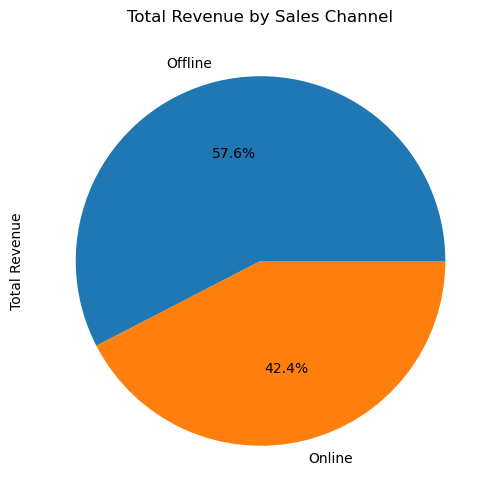

In [29]:
# pie chart for total revenue by sale channel
plt.figure(figsize=(6,6))
plt.tight_layout()
TotalRevenue_saleschannel.plot(kind='pie',autopct='%1.1f%%')
plt.title('Total Revenue by Sales Channel')

(-1.0999999530116766,
 1.0999990132545814,
 -1.0999995737000883,
 1.0999999797000042)

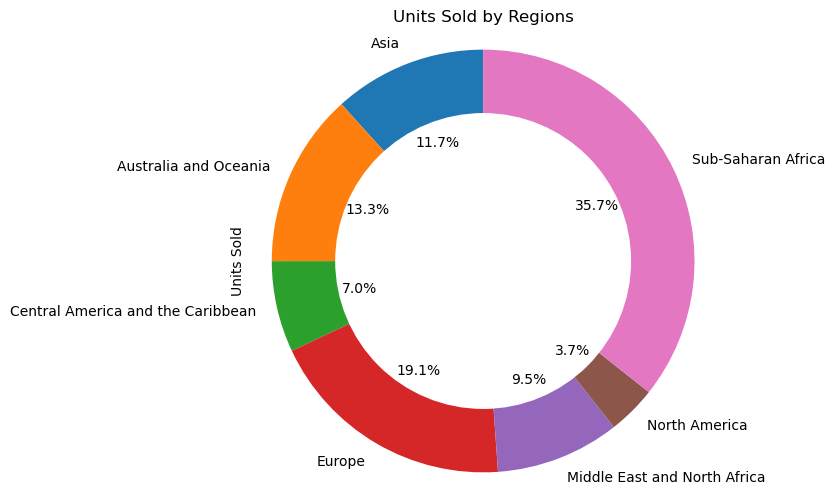

In [40]:
#Create a Pie chart for a donut chart
Region_UnitSold = sales.groupby ('Region') ['Units Sold'].sum()
plt.figure(figsize=(6,6))
Region_UnitSold.plot(kind='pie', labels=Region_UnitSold.index, autopct="%1.1f%%", startangle=90)
                                         
#Draw a circle at the centre of the pie Chart 
cntr_circle= plt.Circle ((0,0), (0.70), fc="white") 
fig=plt.gcf()
fig.gca().add_artist(cntr_circle)
                                         
#Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Units Sold by Regions')
plt.axis('equal')

In [41]:
# group unit sold by year month
YearMonth_UnitSold = sales.groupby(['Year','Month'])['Units Sold'].sum()

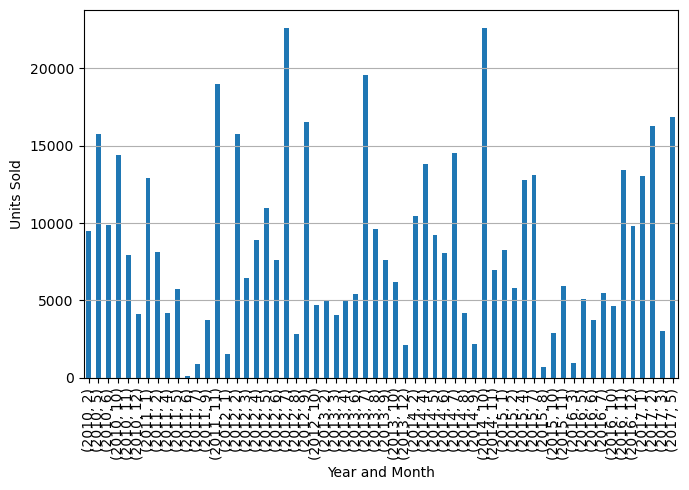

In [45]:
#create a bar chart for unit sold by year and month
plt.figure(figsize=(7,5))
YearMonth_UnitSold.plot(kind='bar')
plt.xlabel('Year and Month')
plt.ylabel('Units Sold')
plt.tight_layout()
plt.grid(axis='y')

In [48]:
# group total cost by sales channel
TotalCost_SalesChannel = sales.groupby('Sales Channel')['Total Cost'].sum()

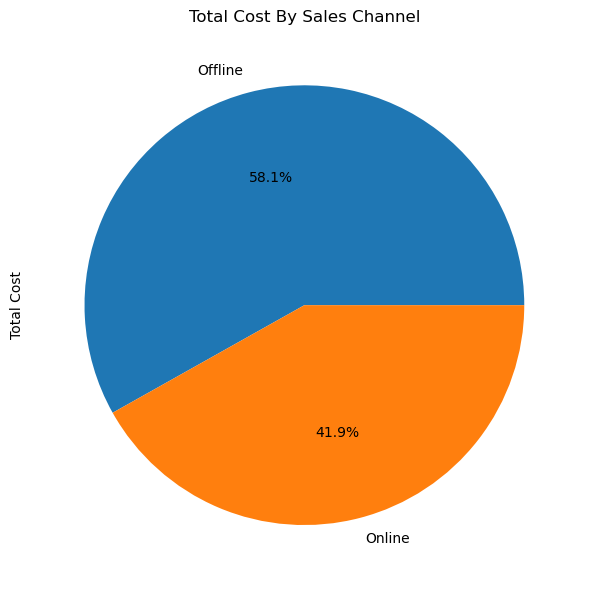

In [49]:
#bar chart for total cost by sales channel
plt.figure(figsize=(6,6))
TotalCost_SalesChannel.plot(kind='pie',autopct='%1.1f%%')
plt.title('Total Cost By Sales Channel')
plt.tight_layout()

In [51]:
sales.to_csv("Amazon Sales data.csv", index=False) 